<IPython.core.display.Javascript object>


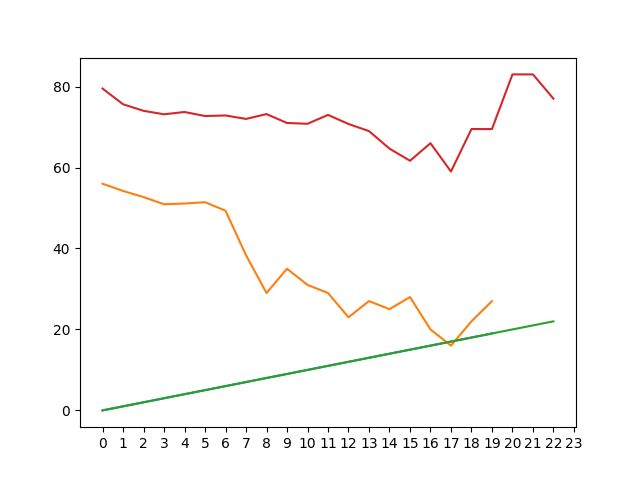

White tot: 18
White tot: 15


In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt
import yaml
import os
import numpy as np
from matplotlib.ticker import MaxNLocator

def avg_branching_factor(reports):
    acc = dict()
    num = dict()
    
    if len(reports) > 0:
        for report in reports:
            if isinstance(report, list):
                # old reports --> only an array of reports
                for (depth, val) in enumerate(report):
                    if "choices_num" in val:
                        #print("{}) Branching factor: {}".format(depth,val["choices_num"]))
                        if not depth in acc:
                            acc[depth] = val["choices_num"]
                            num[depth] = 1
                        else:
                            acc[depth] += val["choices_num"]
                            num[depth] += 1
                        
                    elif "tot_childrens" in val:
                        if not depth in acc:
                            acc[depth] = val["tot_childrens"]
                            num[depth] = 1
                        else:
                            acc[depth] += val["tot_childrens"]
                            num[depth] += 1
                        #print("{}) Branching factor: {}".format(depth,val["tot_childrens"]))
                        
    
    
    
    plt.xticks(np.arange(30))
    
    avg = list(map(lambda sum,num: (sum[0], sum[1]/num[1]), acc.items(), num.items()))
    
    #print(acc)
    #print(num)
    #print(avg)

    plt.plot(avg)


# main
base_dir = '../../reports'

white_reports = []
black_reports = []

white_tot = 0
black_tot = 0

for file in os.listdir(base_dir):
    filename = os.fsdecode(file)
    if filename.endswith(".yaml"):
        with open(base_dir+ "/" +filename) as stream:
            try:
                if filename.startswith("white"):
                    white_reports.append(yaml.safe_load(stream))
                    white_tot += 1
                else:
                    black_reports.append(yaml.safe_load(stream))
                    black_tot += 1
            except yaml.YAMLError as exc:
                print(exc)
    
    
avg_branching_factor(white_reports)      
avg_branching_factor(black_reports)      

print("White tot:", white_tot)
print("White tot:", black_tot)

